# HW1: Cancer Diagnosis Using Machine Learning 
## By: Alejandro Bernal, CS4662

In [1]:
# For auto completion
%config IPCompleter.greedy=True

In [2]:
# a) Read the dataset using pandas
import pandas as pd

cancer_df = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")
# Display the data
cancer_df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1,0
146,9,7,7,5,5,10,7,8,3,1
147,10,8,8,4,10,10,8,1,1,1
148,1,1,1,1,2,1,3,1,1,0


In [3]:
# b- Split into testing and Training Sets
# Features
features = cancer_df.columns.values[:-1]
# label
label = cancer_df.columns.values[-1]
# Define the test and train data
X = cancer_df[features]
y = cancer_df[label]

# Split Data using Sklearn function train_test_split
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [4]:
# c- Use Decision Tree Classifier  to Predict cancer based on previous Training and testing set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Plot AUC of ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Accuracy and Prediction data
my_DecisionTree = DecisionTreeClassifier(random_state=2)
my_DecisionTree.fit(X_train, y_train)
y_predict = my_DecisionTree.predict(X_test)
# Positive probabilities
positive_probs = my_DecisionTree.predict_proba(X_test)
positive_probs = positive_probs[:,1]

# Get Accuracy Score for Prediction
my_DecisionTree_score = accuracy_score(y_test, y_predict)
print(f"Accuracy Score: {my_DecisionTree_score}")
# Get AUC score of predcitions
auc = roc_auc_score(y_test, positive_probs)
print(f"AUC: {auc}")

Accuracy Score: 0.8095238095238095
AUC: 0.8174981658107117


In [5]:
#d- Perform bagging on 29 base Decision Tree Classifiers
# Create and resample 29 decision trees
import numpy as np
from sklearn.utils import resample
import collections
# Bootstrap size from the original data
bootstrap_size = int(0.8*(len(cancer_df)))
# Store results from the new Testing data
new_prediction = []

# Bootstrapping time
for i in range(29):
    # New Training data 
    new_xtrain, new_ytrain = resample(X_train, y_train, n_samples= bootstrap_size, random_state=i, replace=True)
    # Define new Base Decision Tree and train with the new train data
    base_dt = DecisionTreeClassifier(random_state=2)
    base_dt.fit(new_xtrain, new_ytrain)
    # New Decision Tree Predictions
    new_ypredict = base_dt.predict(X_test)
    # Add to new predictions to the list
    new_prediction.append(new_ypredict)
    
majority = []
# Majority vote using python hash mapping
for each_list in new_prediction:
    # use collections to count through each number in each array
    # use this information to create a dictionary and find the mode of each subset
    count = collections.Counter(each_list)
    count_dict = dict(count)
    # Get number with the highest frequncy in the dictionary
    max_value = max(list(count.values()))
    # add the new found values from each list to majority list
    for num, freq in count_dict.items():
        if freq == max_value:
            majority.append(num)

print(f'After Creating {len(majority)} sub list with values our final result the Majority Vote List: {majority}')
# Probability of Malignant cancer
malignant_probs = base_dt.predict_proba(X_test)
malignant_probs = malignant_probs[:,1]
avg_malignant = sum(malignant_probs)/len(malignant_probs)
print(f'The Probability of Malignant cancer is {avg_malignant}')
# Calculate Accuracy Score and AUC
my_bootstrap_score = accuracy_score(y_test, malignant_probs)
print(f'Bagging ACCURACY SCORE: {my_bootstrap_score}')
auc_bootstrap_score = roc_auc_score(y_test, malignant_probs)
print(f'AUC for Bootstrapping: {auc_bootstrap_score}')

After Creating 29 sub list with values our final result the Majority Vote List: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
The Probability of Malignant cancer is 0.45714285714285713
Bagging ACCURACY SCORE: 0.8285714285714286
AUC for Bootstrapping: 0.8367571533382244


In [6]:
# e- Use SciKit Learn ADAboost classifier to predict cancer based in Training and testins sets 
from sklearn.ensemble import AdaBoostClassifier

my_Adaboost = AdaBoostClassifier(n_estimators=29, random_state=2)
my_Adaboost.fit(X_train, y_train)
ada_ypredict = my_Adaboost.predict(X_test)
# Positive probabilities
ada_positive_probs = my_Adaboost.predict_proba(X_test)
ada_positive_probs = ada_positive_probs[:,1]

# Present accuracy score for each AUC and the Accurcy score
my_Adaboost_score = accuracy_score(y_test, ada_ypredict)
print(f'ADAboost Classifier Score: {my_Adaboost_score}')
my_Adaboost_auc = roc_auc_score(y_test, ada_positive_probs)
print(f'ADAboost Classifier AUC: {my_Adaboost_auc}')

ADAboost Classifier Score: 0.8380952380952381
ADAboost Classifier AUC: 0.8756419662509171


In [7]:
# f- Use XGboost Classifier and repeat steps from part (e)
from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators=29, random_state=2)
my_XGBoost.fit(X_train, y_train)
XGB_ypredict = my_XGBoost.predict(X_test)
# Positive Probabilities
XGB_positive_probabilities = my_XGBoost.predict_proba(X_test)
XGB_positive_probabilities = XGB_positive_probabilities[:,1]

# Present the Accuracy score and AUC 
my_XGBoost_score = accuracy_score(y_test, XGB_ypredict)
print(f'XGBoost Classifier Score: {my_XGBoost_score}')
my_XGBoost_auc = roc_auc_score(y_test, XGB_positive_probabilities)
print(f'XGBoost Classifier AUC: {my_XGBoost_auc}')

XGBoost Classifier Score: 0.8571428571428571
XGBoost Classifier AUC: 0.9427732942039618


In [8]:
# g- Use Random forest and repeat steps from part (e) and (g)
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=2)
my_RandomForest.fit(X_train, y_train)
RandomForect_ypredict = my_RandomForest.predict(X_test)
# Positive probabilities
RandomForest_positive_probs = my_RandomForest.predict_proba(X_test)
RandomForest_positive_probs = RandomForest_positive_probs[:,1]

# Present the Accuracy and the AUC
my_RandomForest_score = accuracy_score(y_test, RandomForect_ypredict)
print(f'Random Forest accuracy Score: {my_RandomForest_score}')
my_RandomForest_auc = roc_auc_score(y_test, RandomForest_positive_probs)
print(f'Random Forest AUC: {my_RandomForest_auc}')

Random Forest accuracy Score: 0.8952380952380953
Random Forest AUC: 0.9612986060161408


In [9]:
# Decision Tree
decisionTree_fpr, decisionTree_tpr, decisionTree_Threshold = roc_curve(y_test, positive_probs)
# My Bootstrapping
bootstrap_fpr, bootstrap_tpr, bootstrap_Threshold = roc_curve(y_test, malignant_probs)
# AdaBoost
ada_fpr, ada_tpr, ada_Threshold = roc_curve(y_test, ada_positive_probs)
# XGBoost
XGB_fpr, XGB_tpr, XGB_Threshold = roc_curve(y_test, XGB_positive_probabilities)
# Random Forest Classifier
randomForest_fpr, randomForest_tpr, randomForest_thresholds = roc_curve(y_test, RandomForest_positive_probs)


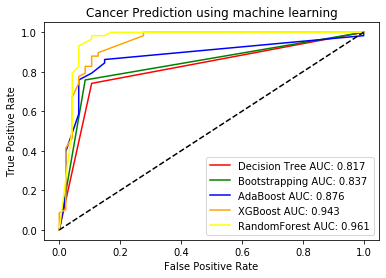

In [10]:
# Plot
plt.plot(decisionTree_fpr, decisionTree_tpr, color='red', label='Decision Tree AUC: {:.3f}'.format(auc))
plt.plot(bootstrap_fpr, bootstrap_tpr, color='green', label='Bootstrapping AUC: {:.3f}'.format(auc_bootstrap_score))
plt.plot(ada_fpr, ada_tpr, color='blue', label='AdaBoost AUC: {:.3f}'.format(my_Adaboost_auc))
plt.plot(XGB_fpr, XGB_tpr, color='orange', label='XGBoost AUC: {:.3f}'.format(my_XGBoost_auc))
plt.plot(randomForest_fpr, randomForest_tpr, color='yellow', label='RandomForest AUC: {:.3f}'.format(my_RandomForest_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cancer Prediction using machine learning')
plt.legend()
plt.show()

# Conclusion
### 1) Which Algorithm is the best AUC value?
#### The best AUC score is presented by out Random Forest Classifier
### 2) Which Algorithm is the best Accuracy value ?
#### Judging from our data we can see that Random forest also has the best accura compared to all other classifiers.
### 3) Which is the best when we want a False Positive Rate of 7%?
#### Decision tree